In [118]:
from astropy.table import Table, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import urllib.request
import astropy.units as u
from astropy.cosmology import z_at_value, FlatLambdaCDM
from astropy import constants as const
from scipy.interpolate import interp1d

In [119]:
os.chdir("/home/benardorci/SimulationData")
os.getcwd()

'/home/benardorci/SimulationData'

In [120]:
Halos = np.load("/home/benardorci/SimulationData/halos.npy")
DMP = np.load("/home/benardorci/SimulationData/dm_cat_ds_100.npy")
CheckingEverythingIsAlright = 117

In [121]:
# MassBins, where:  

#
#                                RETURN MASS BINS !!!!!!!!!!!!!!!!
#

#
#                               NOT USED FOR SINGLE HALO !!!!!!!!!!!!!!!
#

In [122]:
DMP = np.array(DMP)
DMPCopy = DMP.copy()

Radius = 100
HalfHeight = 500

DMP[:,1] = DMP[:,1] + Radius 
DMP[:,2] = DMP[:,2] + Radius 
DMP[:,3] = DMP[:,3] + HalfHeight

NewDMPBoxShell = []

for m, x, y, z, Vx, Vy, Vz in zip(DMPCopy[:,0], DMPCopy[:,1], DMPCopy[:,2], DMPCopy[:,3], DMPCopy[:,4], DMPCopy[:,5], DMPCopy[:,6]) :
    if  x < Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
                
        elif z < HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA  
            
        else :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
            
    elif  x > 1050-Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
                
        elif z < HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        else :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif y < Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif y > 1050-Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif z < HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #CARA             
                  
    elif z > 1050-HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #CARA

In [123]:
print(CheckingEverythingIsAlright)

117


In [124]:
NewDMPBox = np.concatenate((DMP, NewDMPBoxShell))

In [125]:
print(CheckingEverythingIsAlright)

117


In [163]:
IDMostMassiveHalo = np.argmax(Halos[:,0])

#np.argsor       orden de menor a mayor, ::-1 to reverse it

In [164]:
print(IDMostMassiveHalo)
print(MostMassiveHalo)

706836
4506300000000000.0


In [128]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

DistanceOfRS0dot3=cosmo.comoving_distance(0.3)
DistanceOfRS0dot3 = DistanceOfRS0dot3.value
print(DistanceOfRS0dot3,"MPC")

1194.3968697152304 MPC


In [129]:
#                             INTERPOLATION

MPCMin = z_at_value(cosmo.comoving_distance, 0.001*u.Mpc)
MPCMax = z_at_value(cosmo.comoving_distance, 3300*u.Mpc) # 1050 + 1200 + 1050, box + 0.3 RS + Shell (525 each side)
RSgrid = np.linspace(MPCMin, MPCMax, 50000)
MPCgrid = cosmo.comoving_distance(RSgrid)

MPCtoRSInterpolation = interp1d(MPCgrid, RSgrid)                #scipy.interpolate.UnivariateSpline

In [130]:
# New frame of reference (The Halo that was selected).

NewDMPBox[:,1] = NewDMPBox[:,1] - (Halos[IDMostMassiveHalo,1] + Radius)
NewDMPBox[:,2] = NewDMPBox[:,2] - (Halos[IDMostMassiveHalo,2] + Radius)
NewDMPBox[:,3] = NewDMPBox[:,3] - (Halos[IDMostMassiveHalo,3] + HalfHeight) + DistanceOfRS0dot3

# Redshift of the DMP.

DMPBoxRSandA = np.zeros((np.size(NewDMPBox[:,3]),2))
DMPBoxRSandA[:,0] = MPCtoRSInterpolation(NewDMPBox[:,3])
DMPBoxRSandA[:,0] = DMPBoxRSandA[:,0] + (NewDMPBox[:,6]/const.c.value)*(1/(1+DMPBoxRSandA[:,0]))

# Angles of the DMP.

DistanceSquared = NewDMPBox[:,1]**2 + NewDMPBox[:,2]**2 
DMPBoxRSandA[:,1] = np.arctan(np.sqrt(DistanceSquared)/NewDMPBox[:,3])

# Distancesquared can be calculated in this line

#look up arctan2

In [142]:
Cylinder= []
Radians = 3*np.pi/180

for x,y in zip(DMPBoxRSandA[:,0], DMPBoxRSandA[:,1]) :
    if (0.2 <= x <= 0.5 and y <= Radians) :
        Cylinder.append([x, y])


Cylinder = np.array(Cylinder)

In [143]:
Cylinder[0,:]

array([0.27762682, 0.05012772])

In [144]:
np.size(Cylinder)

695136

In [145]:
#np.savetxt("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.txt",FinalVelocities,fmt='%s')

In [146]:
print(CheckingEverythingIsAlright)

117


In [147]:
#np.save("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.npy",FinalVelocities)
#np.save("/calvin1/benardorci/MassBin3HistogramsDS1000Height2Radius0dot5.npy",FinalVelocities)

In [148]:
print(CheckingEverythingIsAlright)

117


In [149]:
#plt.hist(FinalVelocities, bins=100, histtype='bar', stacked=True)
#plt.savefig("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/Many Histograms/MassBin#HistogramsDS1000.png")

In [150]:
print(CheckingEverythingIsAlright)

117


(array([  28.,   13.,   19.,   24.,   44.,   51.,   61.,   60.,  137.,
         126.,   47.,  100.,   72.,   55.,  108., 1851., 3424., 3297.,
        2683., 2732., 2946., 2591., 2411., 2638., 3023., 2657., 3261.,
        3076., 2765., 2478., 3452., 3154., 3310., 5248., 4093., 2965.,
        2393., 2258., 2708., 2896., 2655., 2397., 3118., 3464., 3509.,
        4469., 2868., 2751., 4150., 3950., 3292., 3705., 3177., 3005.,
        3158., 3305., 3791., 4233., 4376., 4342., 3637., 5111., 4996.,
        6074., 5646., 4423., 3395., 3612., 3817., 4525., 4812., 4173.,
        3571., 5306., 4314., 4868., 4730., 5606., 5346., 5495., 6099.,
        4965., 5159., 4744., 4652., 3580., 3593., 4587., 5011., 5242.,
        5462., 4857., 4553., 6948., 5841., 6157., 5648., 7629., 7310.,
        7104.]),
 array([0.20004295, 0.20304252, 0.20604208, 0.20904165, 0.21204121,
        0.21504077, 0.21804034, 0.2210399 , 0.22403946, 0.22703903,
        0.23003859, 0.23303816, 0.23603772, 0.23903728, 0.24203685

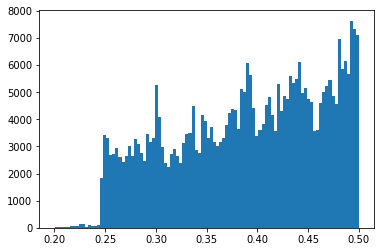

In [151]:
plt.hist(Cylinder[:,0], bins=100) #density=True
#plt.savefig("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.png")
#plt.savefig("/calvin1/benardorci/MassBin3HistogramsDS1000Height2Radius0dot5.png")

(array([ 374.,  454.,  501.,  681.,  981.,  882.,  910., 1141., 1205.,
        1251., 1313., 1244., 1432., 1661., 1528., 1724., 1938., 1989.,
        2441., 2543., 2561., 2705., 2504., 2381., 2668., 2528., 2573.,
        2726., 2660., 2780., 2910., 3190., 3440., 3319., 3263., 3232.,
        3213., 3309., 3347., 3313., 3275., 3487., 3620., 3843., 4225.,
        3827., 3720., 3584., 3668., 3710., 3904., 3611., 3590., 3520.,
        3698., 3601., 3689., 3927., 4249., 4453., 4119., 4038., 4104.,
        3977., 4192., 4191., 4385., 4396., 4270., 4058., 4287., 4239.,
        4294., 4092., 4094., 4070., 4340., 4201., 4229., 4135., 4462.,
        4395., 4869., 4731., 4857., 4801., 5193., 5203., 5143., 4963.,
        5099., 5267., 5397., 5901., 5945., 5490., 5607., 5688., 5569.,
        5261.]),
 array([1.23279615e-05, 5.35803204e-04, 1.05927845e-03, 1.58275369e-03,
        2.10622893e-03, 2.62970418e-03, 3.15317942e-03, 3.67665466e-03,
        4.20012990e-03, 4.72360515e-03, 5.24708039e-03, 5.

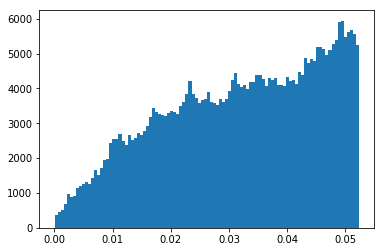

In [152]:
plt.hist(Cylinder[:,1], bins=100) #density=True

In [165]:
FinalVelocitys = const.c.value*(DMPBoxRSandA[:,0]-0.3)/(1.3)

In [173]:
V = []

for x in FinalVelocitys :
    if (-3000000 <= x <= 3000000) :
        V.append(x)

(array([25585., 24547., 24649., 24164., 24969., 25137., 24690., 25070.,
        24506., 24396., 25204., 25529., 25293., 24785., 24948., 25391.,
        25423., 25421., 25605., 25399., 25104., 25380., 25700., 24922.,
        24519., 24519., 25318., 25604., 24803., 24844., 24854., 23970.,
        24355., 24782., 24812., 24218., 24320., 24999., 24693., 24149.,
        24658., 24728., 24239., 24452., 24658., 24711., 25423., 25960.,
        25755., 25101., 24872., 24205., 24267., 24051., 24102., 23290.,
        23988., 23797., 23876., 24243., 24291., 23692., 24511., 24704.,
        25105., 25024., 25940., 25867., 24895., 24516., 24762., 24100.,
        24226., 25030., 25322., 25211., 24926., 25849., 25030., 24856.,
        24728., 25508., 25747., 25049., 25005., 24228., 24223., 24505.,
        24659., 24874., 24889., 24607., 25013., 26213., 25057., 24696.,
        24526., 24358., 24577., 24996.]),
 array([-2.99999781e+06, -2.93999785e+06, -2.87999789e+06, -2.81999793e+06,
        -2.7599979

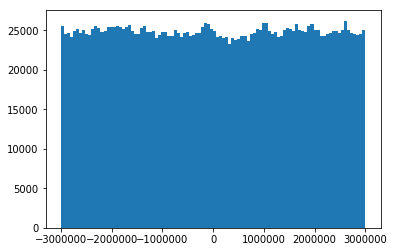

In [174]:
plt.hist(V, bins=100)

(16000000, 24000000)

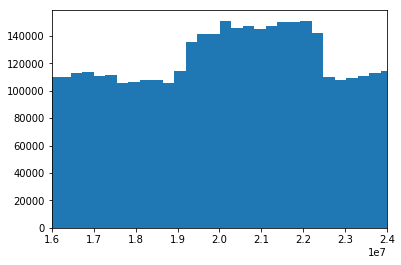

In [182]:
plt.hist(FinalVelocitys, bins=500)
plt.xlim(16000000, 24000000)

(array([645083., 642802., 628234., 628343., 591815., 595935., 644085.,
        615721., 606866., 594192., 584677., 608822., 593570., 596300.,
        600493., 611494., 608643., 605498., 584784., 598722., 585982.,
        573752., 589042., 596522., 587787., 591088., 587588., 587296.,
        567095., 570652., 560607., 568612., 566680., 558475., 557624.,
        544317., 562758., 556963., 560199., 561902., 561340., 556421.,
        553315., 542484., 604466., 730263., 740191., 551390., 556119.,
        542431., 539026., 525240., 502056., 510865., 551188., 526999.,
        521973., 514117., 493965., 501089., 517863., 504136., 502712.,
        508122., 513472., 515196., 513019., 510954., 496763., 499302.,
        503184., 486183., 480757., 496153., 503353., 492974., 494776.,
        489710., 494982., 488888., 472709., 480086., 468951., 465743.,
        476703., 470063., 465839., 459272., 458295., 454155., 470250.,
        460579., 459362., 466192., 463544., 465868., 454905., 455270.,
      

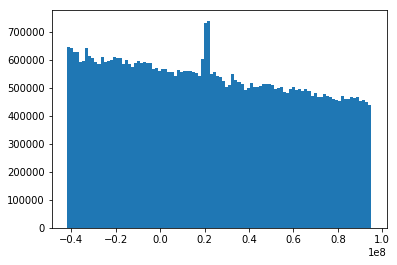

In [177]:
plt.hist(FinalVelocitys, bins=100)